Approach to the problem

1.Load libraries and dependencies

2.Reading the data

3.EDA

4.Data preparation

5.train test split

6.model evaluation-linear regression and decision tree regressor

# loading libraries and dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


# reading the data

In [2]:
big_mart=pd.read_csv('/content/Train-Set.csv')

In [3]:
big_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart.isnull().sum()

,0
ProductID,0
Weight,1463
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
OutletID,0
EstablishmentYear,0
OutletSize,2410
LocationType,0


we can observe here that weight and outlet size has null values we need to fill those null values

In [8]:
big_mart.shape

(8523, 12)

In [10]:
big_mart=big_mart.drop_duplicates()

In [11]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data preparation


categorical features

FatContent

OutletSize

LocationType

OutletType

ProductType

handling missing values

mean-> middle values

mode->repeated values


In [13]:
#mean value of "weight"  column
big_mart['Weight'].mean()

12.857645184135976

In [15]:
big_mart['Weight'].fillna(big_mart['Weight'].mean(),inplace=True)

<ipython-input-15-04b24d276a56>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart['Weight'].fillna(big_mart['Weight'].mean(),inplace=True)


In [17]:
big_mart['OutletSize'].fillna(big_mart['OutletSize'].mode()[0], inplace=True)

<ipython-input-17-2c16e82f54f8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart['OutletSize'].fillna(big_mart['OutletSize'].mode()[0], inplace=True)


In [18]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EDA

<ipython-input-22-6233371e8972>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Weight'], label='Weight')


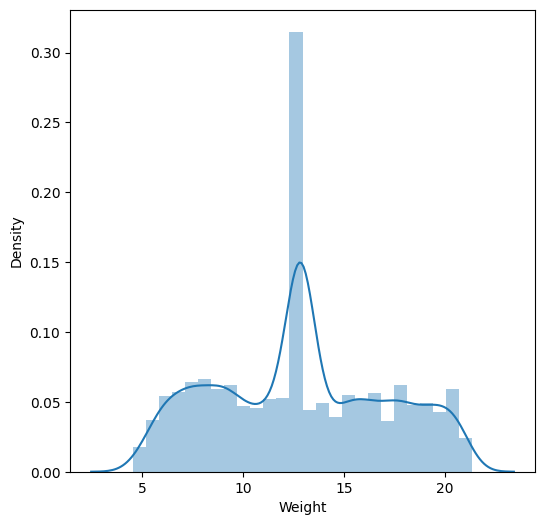

In [22]:
plt.figure(figsize=(6,6))

sns.distplot(big_mart['Weight'], label='Weight')
plt.show()

<ipython-input-23-4e6e143852a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['ProductVisibility'], label='Visibility')


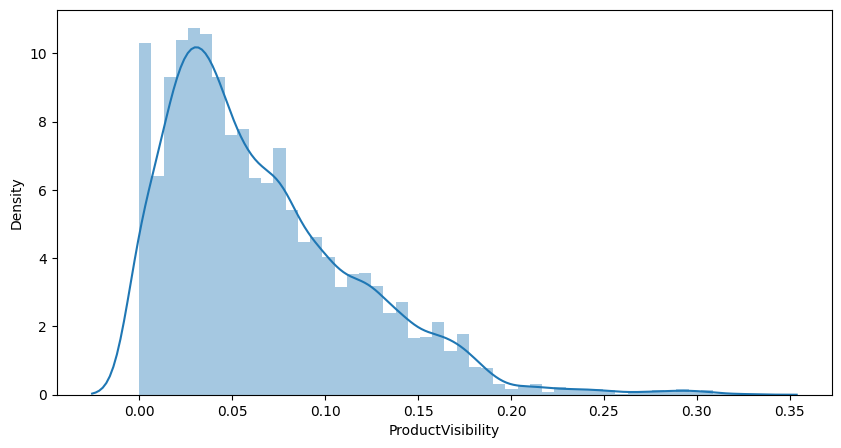

In [23]:
plt.figure(figsize=(10,5))

sns.distplot(big_mart['ProductVisibility'], label='Visibility')
plt.show()

<ipython-input-24-b8f018b3a568>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['MRP'], label='MRP')


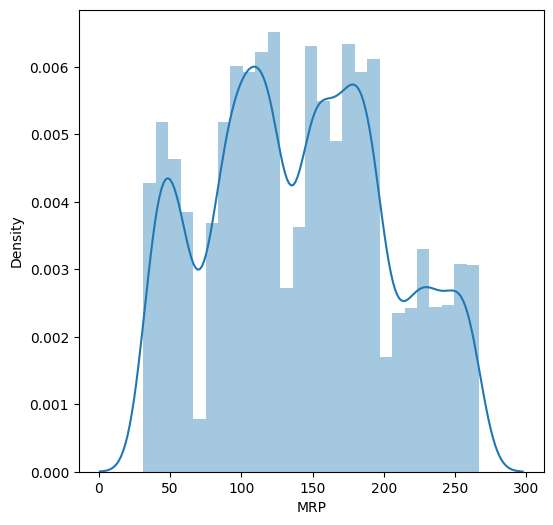

In [24]:
plt.figure(figsize=(6,6))

sns.distplot(big_mart['MRP'], label='MRP')
plt.show()

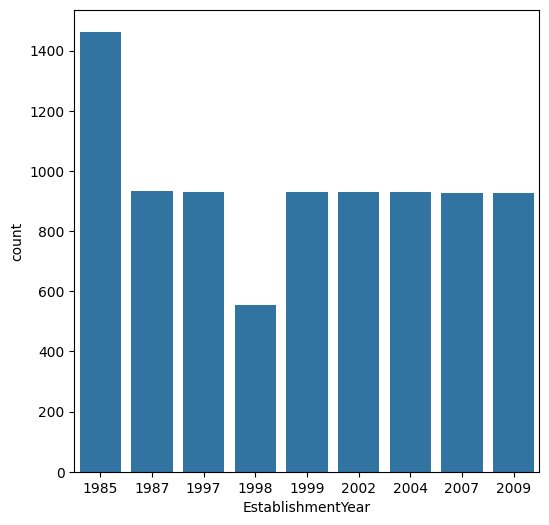

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='EstablishmentYear', data=big_mart)
plt.show()


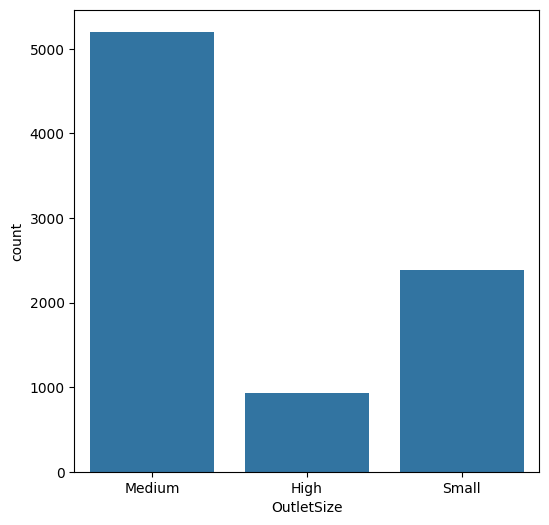

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='OutletSize', data=big_mart)
plt.show()

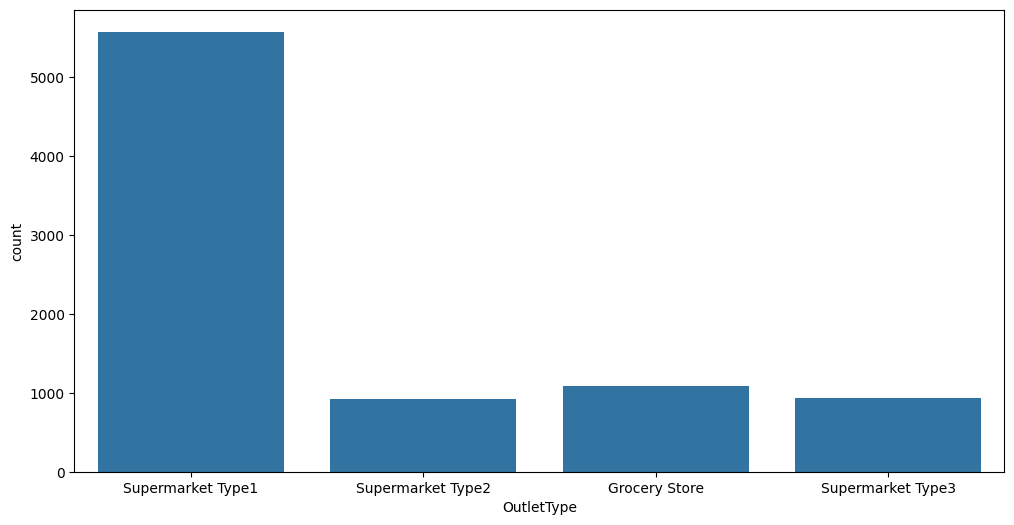

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='OutletType', data=big_mart)
plt.show()

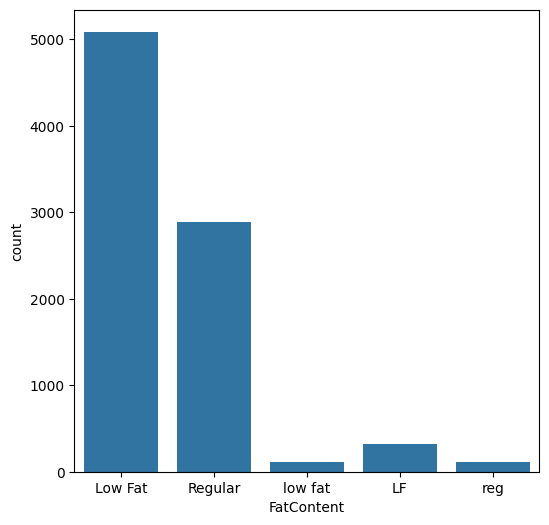

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent', data=big_mart)
plt.show()

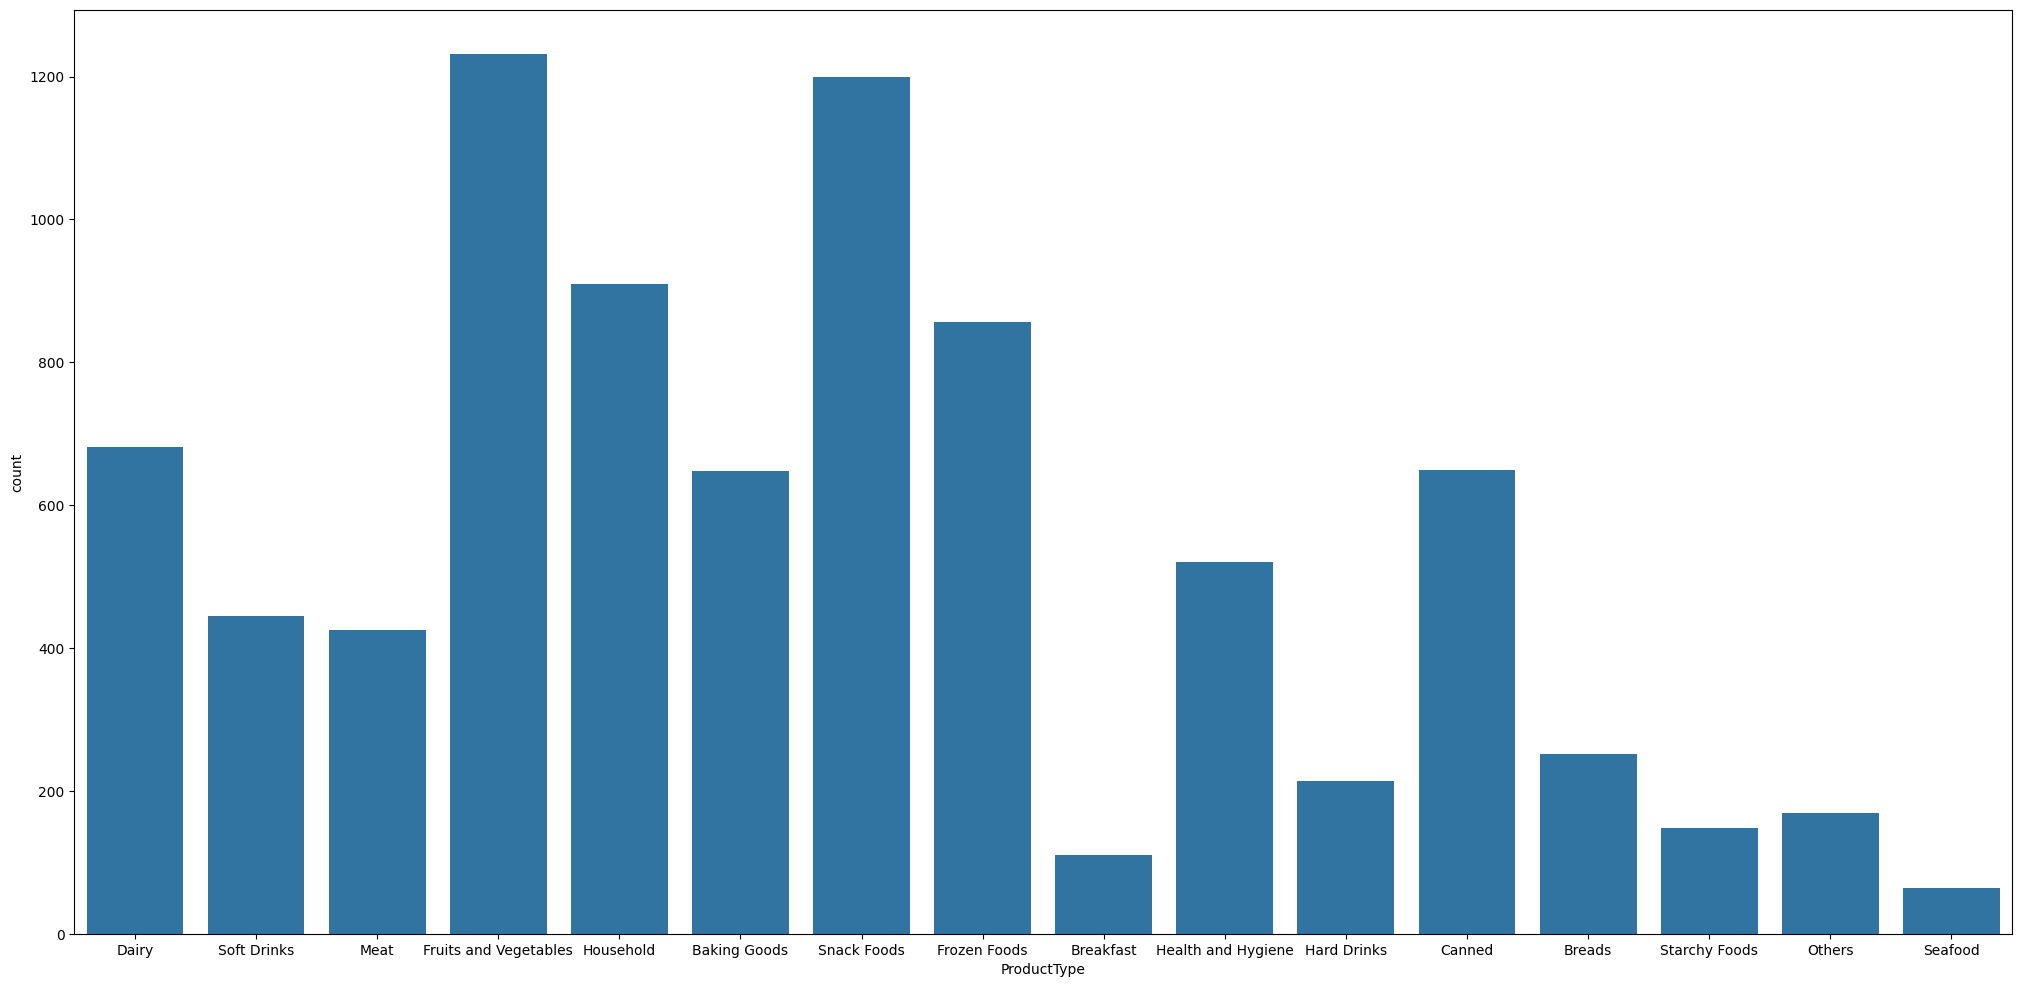

In [36]:
plt.figure(figsize=(25,12))
sns.countplot(x='ProductType', data=big_mart)
plt.show()

<Axes: >

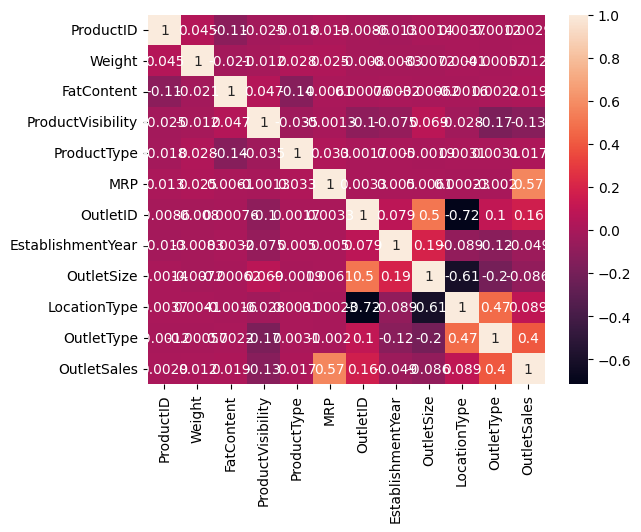

In [104]:
sns.heatmap(big_mart.corr(), annot=True)

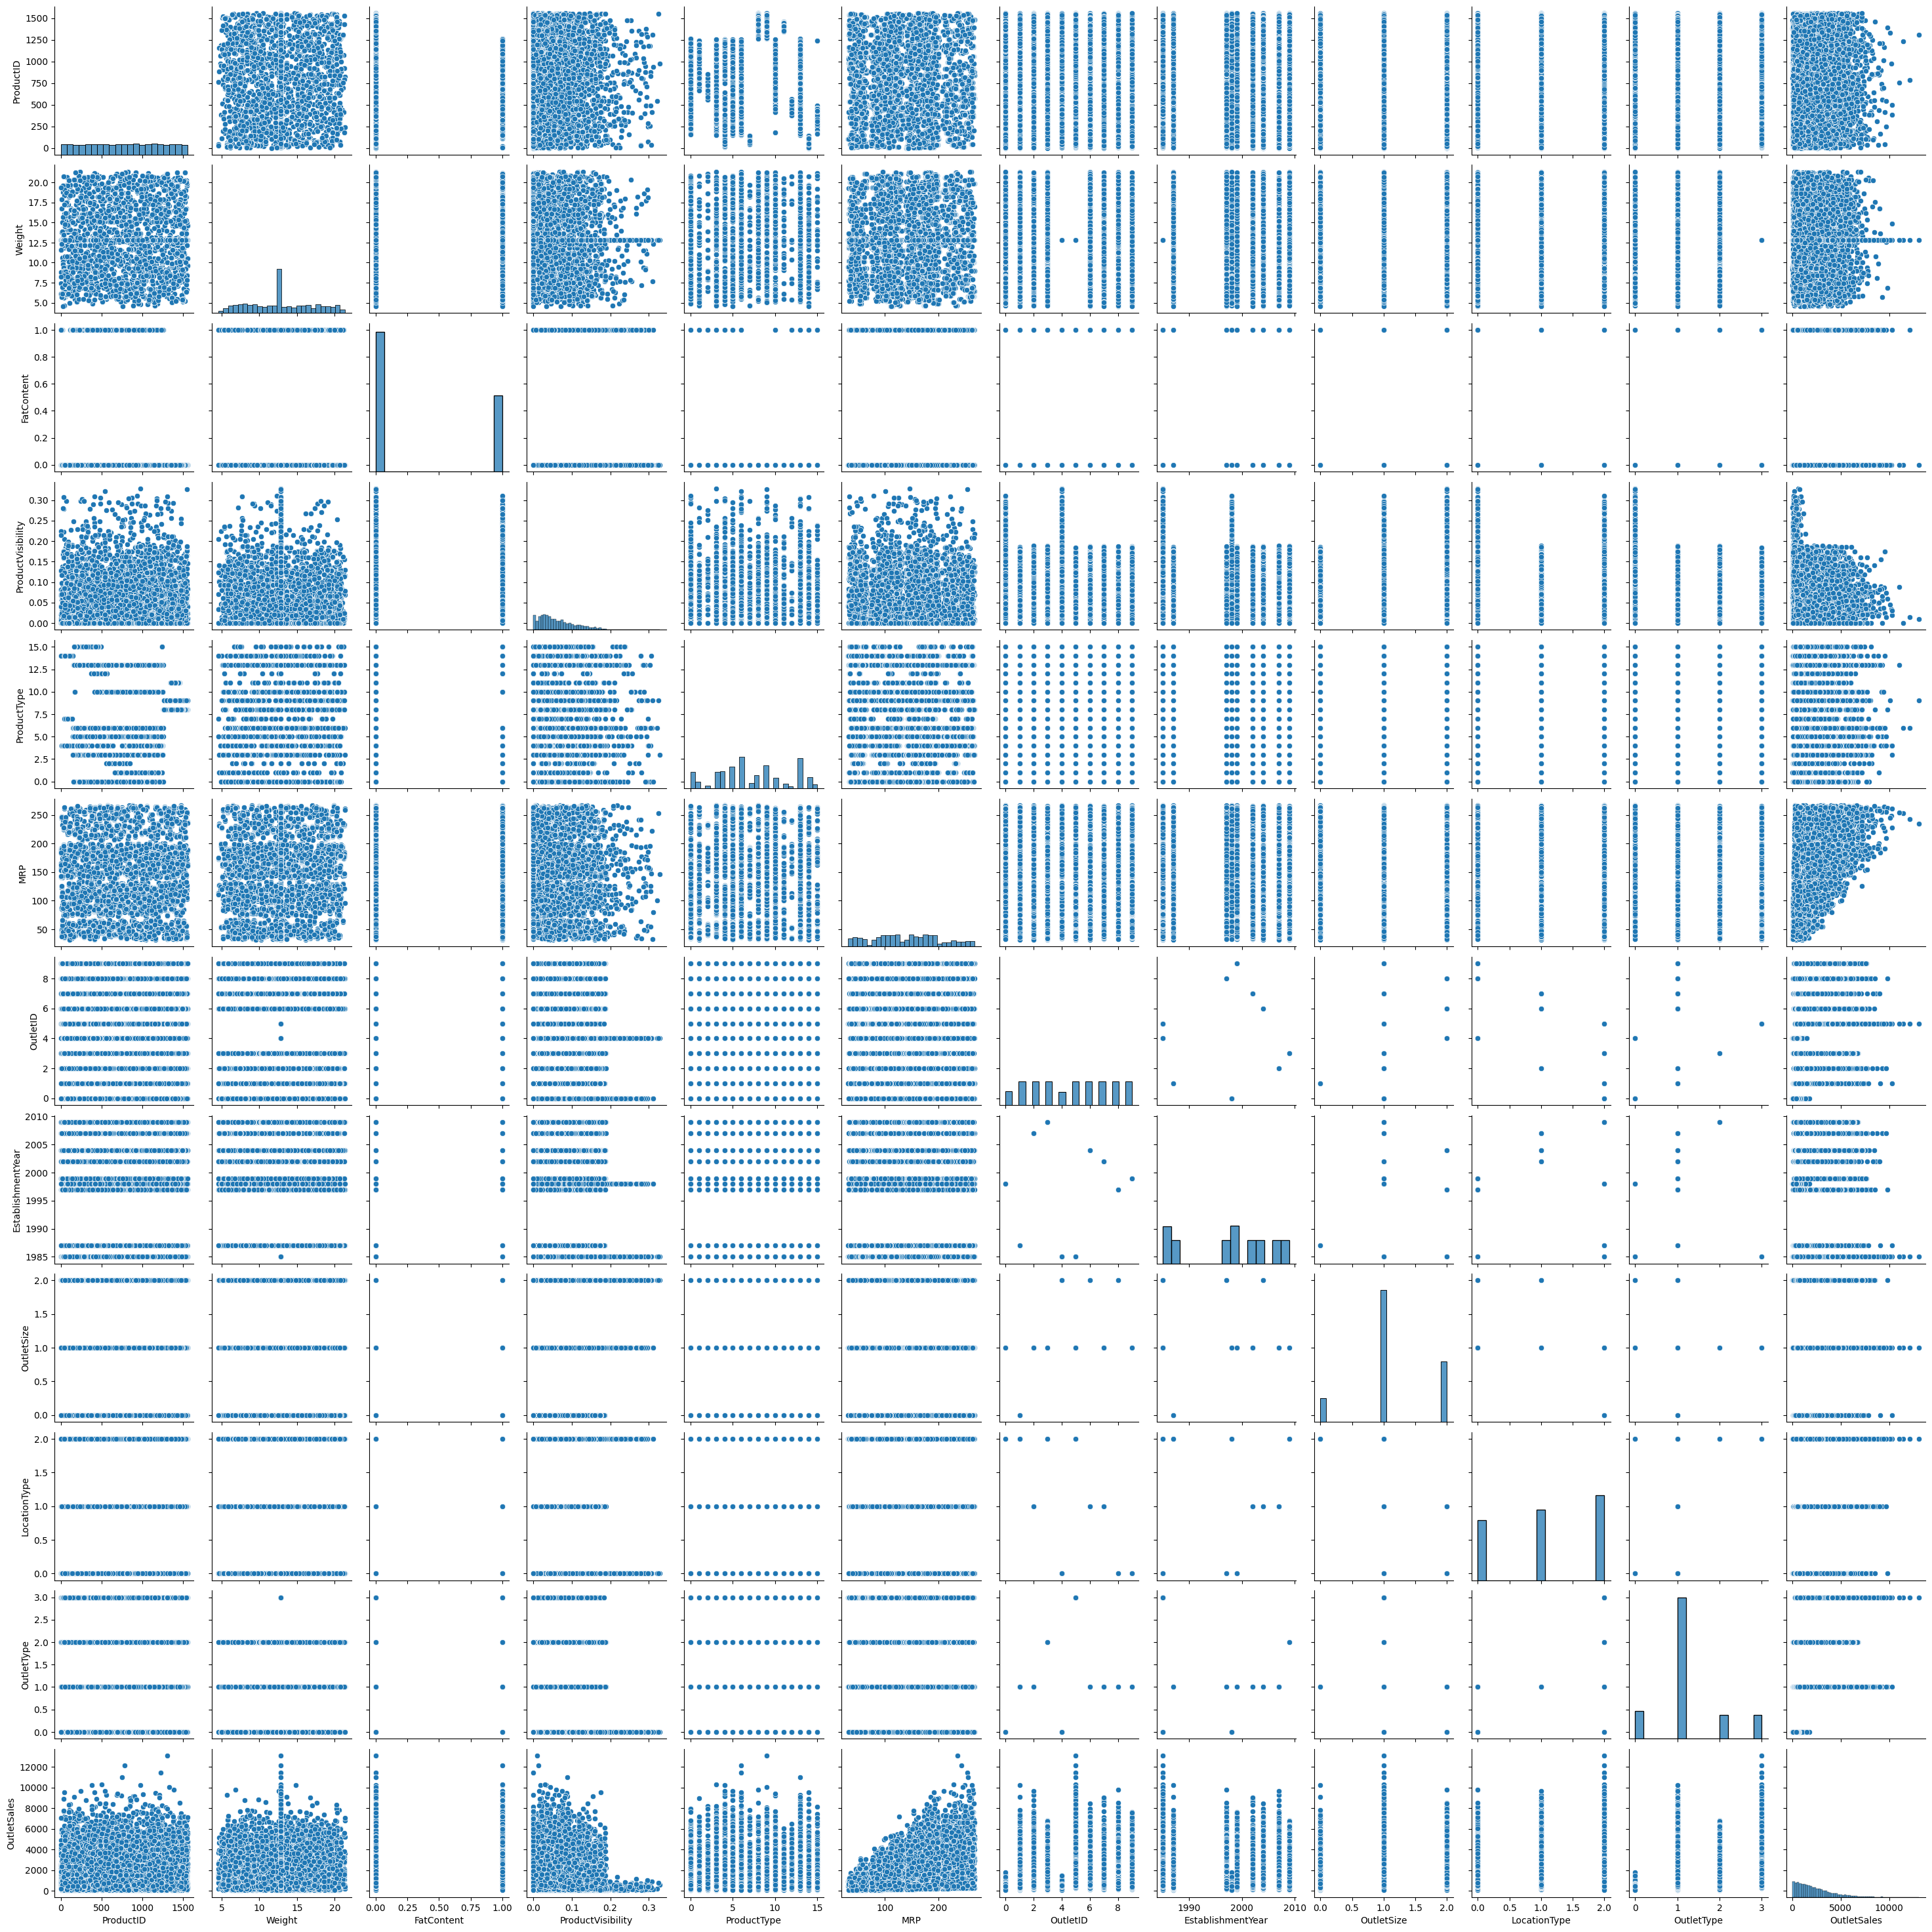

In [105]:
sns.pairplot(big_mart)

In [37]:
big_mart['FatContent'].value_counts()

,count
FatContent,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


as you can see here that the fatcontent has low fat,Low Fat,LF all explains the same Low fat ...so we need to change that to a single one Low Fat

In [39]:
category_mapping = {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Low Fat': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular',
    'regular': 'Regular'
}

# Apply the mapping to the 'Item_Fat_Content' column
big_mart['FatContent'] = big_mart['FatContent'].replace(category_mapping)


In [40]:
big_mart['FatContent'].value_counts()

,count
FatContent,
Low Fat,5517
Regular,3006


# label encoding

In [41]:


# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in ['FatContent', 'OutletSize', 'LocationType', 'OutletType', 'ProductType']:
    big_mart[col] = le.fit_transform(big_mart[col])


In [55]:
# Create instances of LabelEncoder for 'ProductID' and 'OutletID'
product_le = LabelEncoder()
outlet_le = LabelEncoder()

# Apply fit_transform to the columns
big_mart['ProductID'] = product_le.fit_transform(big_mart['ProductID'])
big_mart['OutletID'] = outlet_le.fit_transform(big_mart['OutletID'])


In [56]:
big_mart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# train test split

In [57]:
x= big_mart.drop(columns=['OutletSales'])

# Target variable (y)
y = big_mart['OutletSales']



In [58]:
# Perform the train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 11)
(1705, 11)
(6818,)
(1705,)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Model evaluation

In [64]:
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [65]:

print(lr.intercept_)

862.5146593820409


In [66]:
print(lr.coef_)

[ 9.01710362e-03 -2.56157156e+00  6.86900267e+01 -1.56638405e+03
  2.36921809e-01  1.56117931e+01  6.49104642e+01 -7.32957698e-01
 -3.59868728e+02 -2.08611666e+02  8.63075548e+02]


In [67]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

ProductID: 0.01
Weight: -2.56
FatContent: 68.69
ProductVisibility: -1566.38
ProductType: 0.24
MRP: 15.61
OutletID: 64.91
EstablishmentYear: -0.73
OutletSize: -359.87
LocationType: -208.61
OutletType: 863.08


In [69]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)


In [70]:
y_train

,OutletSales
549,2386.2272
7757,3103.9596
764,1125.2020
6867,284.2966
2716,4224.5010
...,...
5734,280.9676
5191,1301.6390
5390,6145.3340
860,1649.8524


In [71]:
y_hat_train

array([3160.30035793, 2700.15475449, 1722.85314915, ..., 3790.04105413,
       1528.53312083, 1502.49152889])

In [72]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 1208.18


In [73]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 1136.66


In [74]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.51


In [75]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is 0.52


In [94]:

from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)



DecisionTreeRegressor()

In [96]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)


In [97]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))

r2 score of the model for train data is: 1.0


In [98]:

print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))

r2 score of the model for test data is: 0.2


In [99]:

rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [100]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))


1473.6


Text(0.5, 1.0, 'tree for the prediction columns')

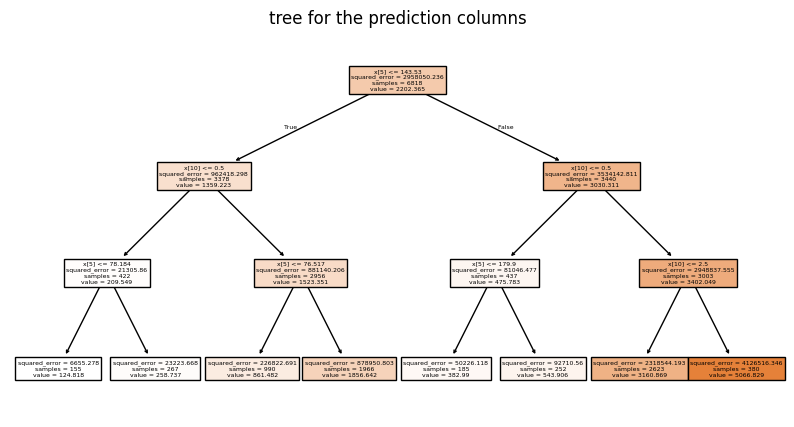

In [101]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")